## Import des librairies

In [148]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import gzip
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import preprocessing

import seaborn as sns
sns.set(style="darkgrid")

# Import des données

In [2]:
for i in range(1,16):
    with open('S'+str(i)+'/S'+str(i)+'.pkl', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        exec("p"+str(i)+" = u.load()")

# Préprocessing

In [149]:
def preprocessing_data(subject):
    result_python = {}
    result_python["activity"]=np.squeeze(subject["activity"])[::4]
    result_python["respiration"]=np.squeeze(subject["signal"]["chest"]["Resp"])[::700]
    result_python["ECG"]=np.squeeze(subject["signal"]["chest"]["ECG"])[::700]
    result_python["ACC_c_x"] =np.squeeze(subject["signal"]["chest"]["ACC"])[::700,0]
    result_python["ACC_c_y"] =np.squeeze(subject["signal"]["chest"]["ACC"])[::700,1]
    result_python["ACC_c_z"] =np.squeeze(subject["signal"]["chest"]["ACC"])[::700,2]
    result_python["ACC_w_x"] =np.squeeze(subject["signal"]["wrist"]["ACC"])[::32,0]
    result_python["ACC_w_y"] =np.squeeze(subject["signal"]["wrist"]["ACC"])[::32,1]
    result_python["ACC_w_z"] =np.squeeze(subject["signal"]["wrist"]["ACC"])[::32,2]
    result_python["temperature"] =np.squeeze(subject["signal"]["wrist"]["TEMP"])[::4]
    result_python["EDA"] =np.squeeze(subject["signal"]["wrist"]["EDA"])[::4]
    result_python["BVP"] =np.squeeze(subject["signal"]["wrist"]["BVP"])[::64]
    result_python["WEIGHT"]=np.squeeze(subject["questionnaire"]["WEIGHT"])
    result_python["Gender"]=np.squeeze(1 if subject["questionnaire"]["Gender"]==' m' else 0)
    result_python["AGE"]=np.squeeze(subject["questionnaire"]["AGE"])
    result_python["SKIN"]=np.squeeze(subject["questionnaire"]["SKIN"])
    result_python["HEIGHT"]=np.squeeze(subject["questionnaire"]["HEIGHT"])
    result_python["SPORT"]=np.squeeze(subject["questionnaire"]["SPORT"])
    label_result=[]
    for i in range(len(subject["label"])):
        label_result.append(subject["label"][i])
        label_result.append(subject["label"][i])
    for i in range(abs(len(label_result)-len(result_python["activity"]))):
        label_result.append(subject["label"][len(subject["label"])-1])
    result_python["label"]=np.squeeze(label_result)
    return pd.DataFrame(result_python)

In [150]:
for i in range(1,16):
    exec("df"+str(i)+"=preprocessing_data(p"+str(i)+")")
    exec("X"+str(i)+"_train,X"+str(i)+"_test,y"+str(i)+"_train,y"+str(i)+"_test=train_test_split(df"+str(i)+"[df"+str(i)+".columns[df"+str(i)+".columns!=\"activity\"]], df"+str(i)+"[\"activity\"], test_size=0.33,stratify=df"+str(i)+"[\"activity\"])")

In [151]:
df1.head(10)

,activity,respiration,ECG,ACC_c_x,ACC_c_y,ACC_c_z,ACC_w_x,ACC_w_y,ACC_w_z,temperature,EDA,BVP,WEIGHT,Gender,AGE,SKIN,HEIGHT,SPORT,label
0,0.0,4.441833,0.015610,0.8564,-0.0678,-0.3656,-0.765625,-0.078125,0.671875,32.13,4.722437,7.28,78.0,1,34,3,182.0,6,49.611369
1,0.0,-1.475525,-0.089905,0.8510,-0.0674,-0.3694,-0.765625,-0.078125,0.671875,32.16,4.713469,34.34,78.0,1,34,3,182.0,6,49.611369
2,0.0,2.915955,0.159714,0.8520,-0.0666,-0.3826,-0.750000,-0.078125,0.671875,32.15,4.698095,6.34,78.0,1,34,3,182.0,6,50.323992
3,0.0,-3.044128,-0.012955,0.8490,-0.0696,-0.3740,-0.750000,-0.078125,0.671875,32.15,4.701939,-28.19,78.0,1,34,3,182.0,6,50.323992
4,0.0,-1.623535,0.014603,0.8300,-0.0102,-0.3502,-1.046875,-0.046875,0.843750,32.15,4.681439,7.70,78.0,1,34,3,182.0,6,52.708336
5,0.0,0.254822,-0.141769,0.8958,-0.1062,-0.2470,-0.734375,-0.406250,0.187500,32.15,4.728843,115.61,78.0,1,34,3,182.0,6,52.708336
6,0.0,0.416565,-0.307617,0.7630,0.0552,-0.6070,-0.859375,-0.390625,0.390625,32.15,4.740374,-120.35,78.0,1,34,3,182.0,6,55.640794
7,0.0,0.411987,0.282623,0.9490,-0.1038,-0.1828,-0.968750,-0.140625,0.109375,32.13,4.751904,-88.50,78.0,1,34,3,182.0,6,55.640794
8,0.0,0.198364,0.604111,0.8894,-0.0520,-0.2520,-1.015625,-0.078125,0.140625,32.15,4.755748,-7.06,78.0,1,34,3,182.0,6,57.658406
9,0.0,-1.084900,-0.038773,0.8798,-0.0510,-0.2532,-1.015625,-0.078125,0.156250,32.16,4.753185,-7.75,78.0,1,34,3,182.0,6,57.658406


In [152]:
X1_train.head(10)

,respiration,ECG,ACC_c_x,ACC_c_y,ACC_c_z,ACC_w_x,ACC_w_y,ACC_w_z,temperature,EDA,BVP,WEIGHT,Gender,AGE,SKIN,HEIGHT,SPORT,label
1070,-7.777405,-0.368225,1.7738,-0.2756,-0.4458,-0.406250,0.812500,0.125000,31.21,8.478024,-116.94,78.0,1,34,3,182.0,6,125.919205
8779,5.442810,-0.099380,0.7514,-0.0872,-0.5692,-0.359375,-0.015625,0.953125,34.31,2.382692,-23.08,78.0,1,34,3,182.0,6,72.407955
917,0.221252,0.907700,1.3046,0.0486,-0.3318,-0.687500,1.000000,0.187500,31.51,7.051165,-16.53,78.0,1,34,3,182.0,6,115.529315
3905,0.042725,-0.004898,0.6970,0.0728,-0.6258,-0.609375,0.078125,0.812500,32.91,6.484100,-6.32,78.0,1,34,3,182.0,6,54.321434
754,-2.226257,-0.112610,0.8474,-0.0338,-0.3574,-0.437500,0.515625,0.250000,31.85,3.806674,-90.39,78.0,1,34,3,182.0,6,68.128722
7343,-0.309753,-0.270950,1.4432,-0.0456,-0.0038,-0.234375,1.015625,0.390625,33.83,4.297588,-36.76,78.0,1,34,3,182.0,6,89.674810
3289,0.033569,-0.222244,0.6848,-0.0254,-0.7334,-0.796875,-0.546875,0.468750,31.35,8.003778,-67.76,78.0,1,34,3,182.0,6,69.494091
1288,4.879761,-0.235794,0.8638,0.0066,-0.1996,-0.781250,0.640625,0.046875,30.67,14.727530,5.01,78.0,1,34,3,182.0,6,63.989808
8052,-2.325439,-0.167770,0.7480,-0.0934,-0.5682,-0.328125,-0.031250,0.953125,34.09,3.578625,-69.44,78.0,1,34,3,182.0,6,74.908710
1770,-3.910828,-0.335678,0.2222,0.0360,-0.0954,-0.375000,0.687500,0.312500,30.81,6.438596,-27.25,78.0,1,34,3,182.0,6,89.948665


# Data Visualisation

Nous allons d'abord essayer d'afficher certaines données en fonction de d'autres afin d'avoir une idée du dataset.

Nous réalisons une ACP afin de voir quels sont les données qui expliquent le plus de variations (ne veux pas forcément dire que ce sont ces données qui sont ces variables qui vont rendre l'algorithme plus précis.

## ACP

In [153]:
from sklearn.decomposition import PCA
df_m = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15])
pca = PCA(n_components=2, svd_solver='full')
RES = pca.fit(df_m[df_m.columns[df_m.columns!="activity"]])
pd.DataFrame(pca.components_,columns=df_m[df_m.columns[df_m.columns!="activity"]].columns,index = ['PC-1','PC-2'])

,respiration,ECG,ACC_c_x,ACC_c_y,ACC_c_z,ACC_w_x,ACC_w_y,ACC_w_z,temperature,EDA,BVP,WEIGHT,Gender,AGE,SKIN,HEIGHT,SPORT,label
PC-1,0.000034,0.000019,0.000004,-0.000002,-0.000017,0.000036,-0.000037,0.000022,-0.000025,-0.000114,0.999999,-0.000395,-0.000002,0.000273,0.000001,-0.000275,-0.000027,-0.000885
PC-2,-0.000607,0.000116,0.000695,-0.000066,0.004064,0.001690,0.006402,-0.002454,0.005390,0.054956,0.000803,-0.171267,-0.009267,-0.123646,0.001326,-0.103243,-0.015787,0.970189


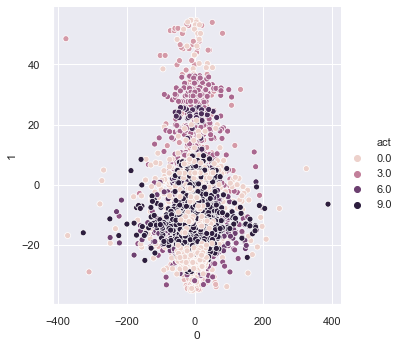

In [159]:
test_pca = pd.DataFrame(pca.transform(df1[df1.columns[df1.columns!="activity"]]))
test_pca["act"]=df1["activity"]
sns.relplot(x=0, y=1, hue="act", data=test_pca);

On observe que la variable qui explique le plus la variation des données est la variable BVP

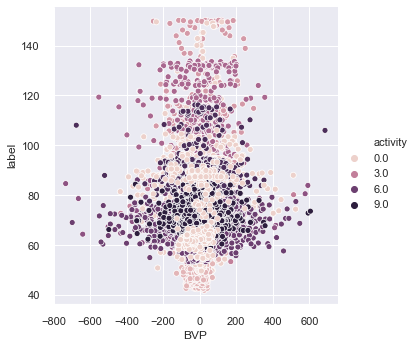

In [168]:
sns.relplot(x="BVP", y="label", hue="activity", data=df1);

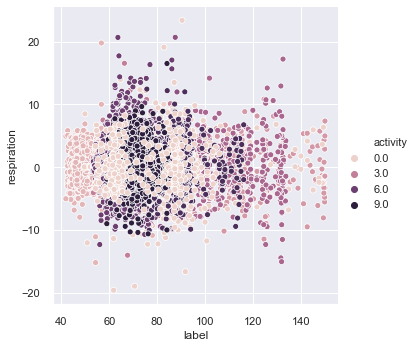

In [169]:
sns.relplot(x="label", y="respiration", hue="activity", data=df1);

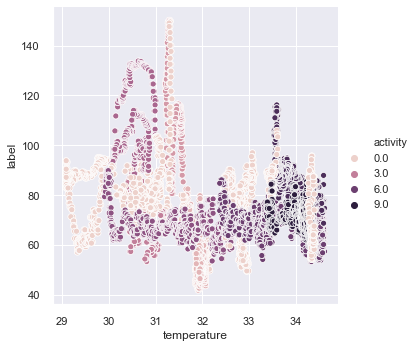

In [171]:
sns.relplot(x="temperature", y="label", hue="activity", data=df1);

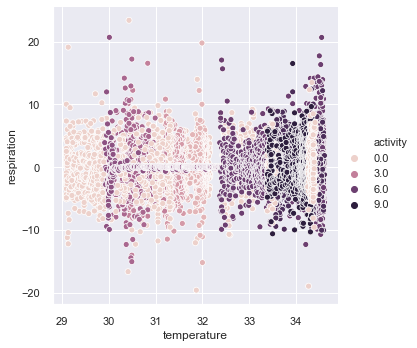

In [172]:
sns.relplot(x="temperature", y="respiration", hue="activity", data=df1);

# Modelisation

Nous décidons d'entrainer plusieurs algorithmes afin de savoir quel algorithme présente les meilleur résultats. 

Pour cela nous récuperons la liste des algorithmes de classification :

    * Nearest Neighbors
    * Decision Tree
    * Random Forest
    * Neural Net
    * AdaBoost
    * Naive Bayes
    * QDA
    
### 1) Première strategie

Nous souhaitons entrainer un algorithme de classification sur un seul patient afin de pouvoir prédire ses futures activitées

/Users/youssef/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/youssef/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/youssef/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/youssef/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/youssef/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/youssef/opt/anaconda3/lib/python3.7/site-packages/sklearn

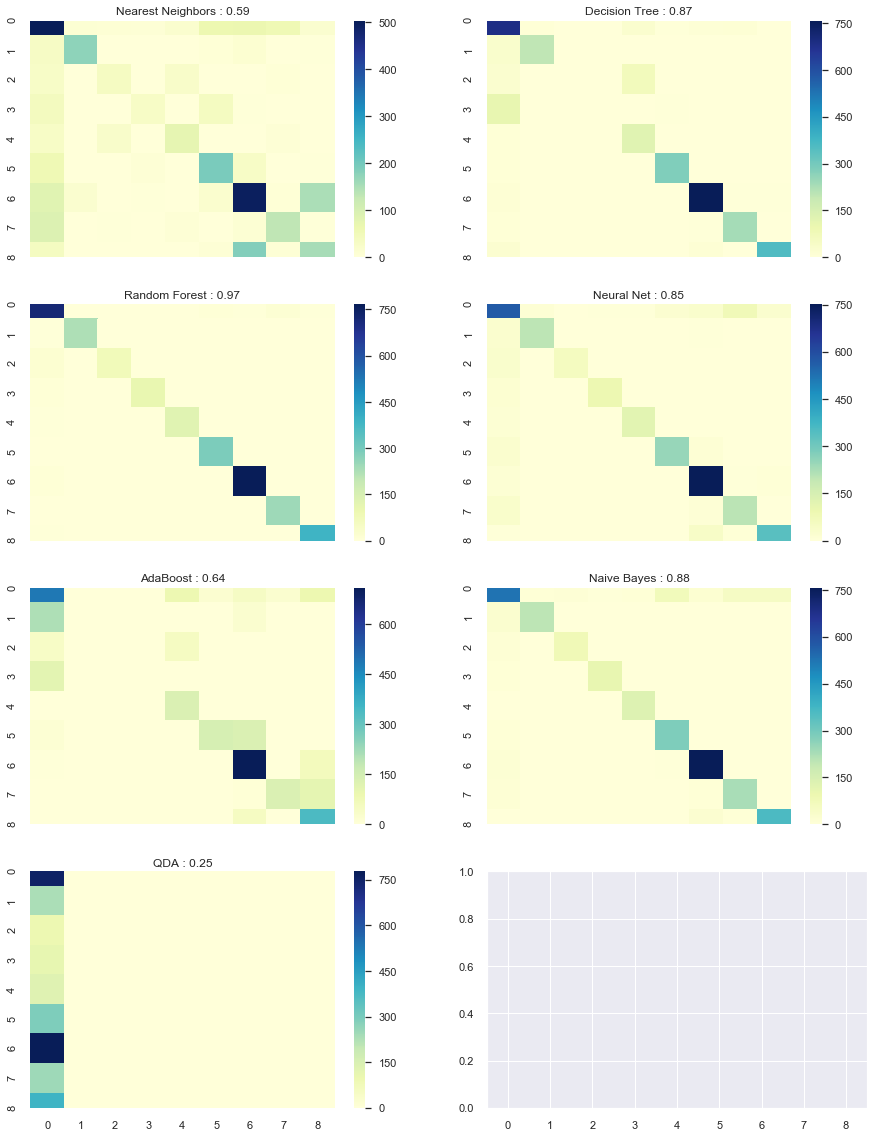

In [161]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()


names = ["Nearest Neighbors", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=15, n_estimators=30, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

f, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True)
i=0
for name,classifier in zip(names, classifiers):
    classifier.fit(X1_train, y1_train)
    y_pred = classifier.predict(X1_test)
    matrix = confusion_matrix(y1_test, y_pred)
    score = classifier.score(X1_test, y1_test)
    sns.heatmap(matrix,cmap="YlGnBu",ax=axes[i//2, i%2]).set_title(name +" : "+ str(round(score,2)))
    i+=1

Nous observons qu'avec un random forest nous avons une plutot bonne précision et qu'il se trompe quasiment pas.
Mais cela n'est pas interessant, nous souhaitons quand meme grace a un lot d'utilisateurs dont on connait les activitées prédire les activitées des utilisateurs qui ne nous les précisent pas (sauf leurs age , sexe etc...)

(une erreure surviens car nous conservons les données du patient dans chaque ligne du dataset)

### 2) Deuxième stratégie

Nous allons donc réaliser un train set avec les 13 premiers patients (utilisateurs) puis nous allons verifier si grace a ces 13 patients nous pouvons prédire les activitées des 2 autres derniers (Un homme et une femme).


#### Test sur le 14ème utilisateur : 

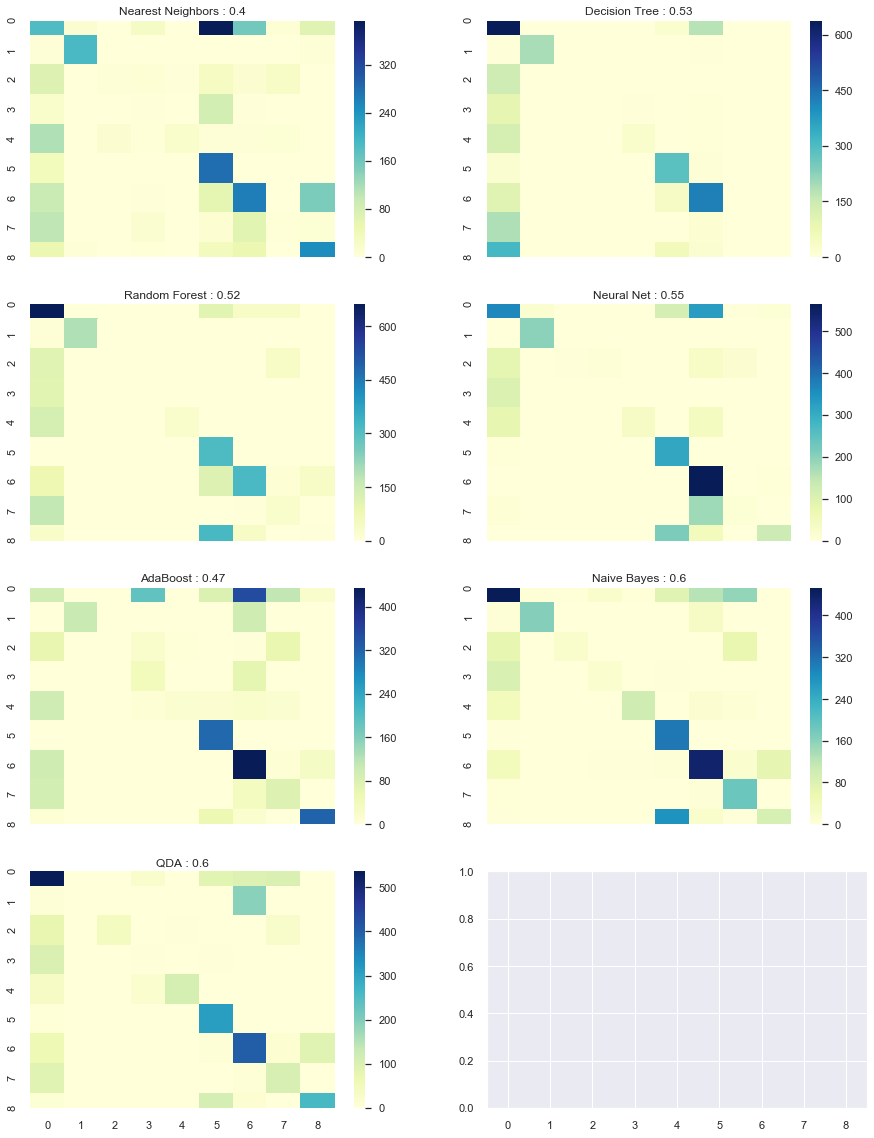

In [162]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()


names = ["Nearest Neighbors", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=15, n_estimators=30, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train,X12_train,X13_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test,X12_test,X13_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train,y12_train,y13_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test,y12_test,y13_test])

f, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True)
i=0
for name,classifier in zip(names, classifiers):
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X14_test)
    matrix = confusion_matrix(y14_test, y_pred)
    score = classifier.score(X14_test, y14_test)
    sns.heatmap(matrix,cmap="YlGnBu",ax=axes[i//2, i%2]).set_title(name +" : "+ str(round(score,2)))
    i+=1

#### Test sur le 15ème utilisateur : 

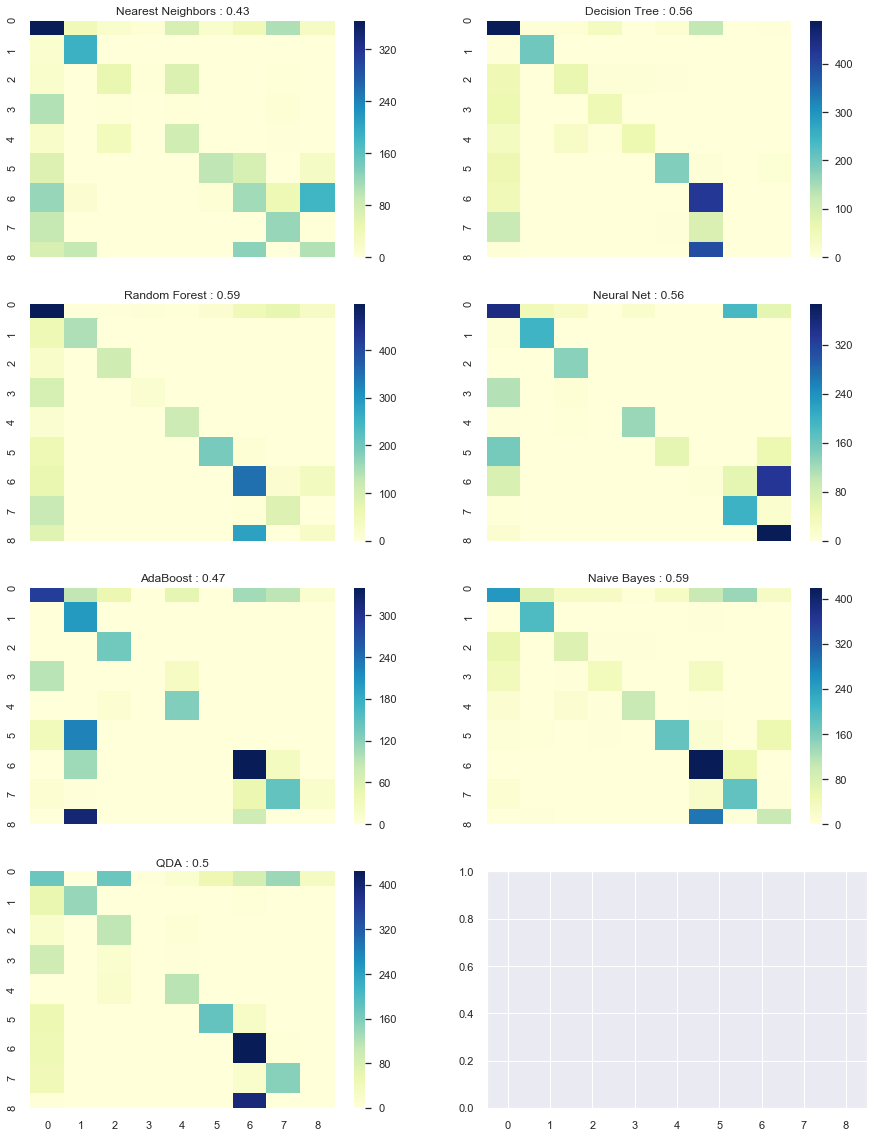

In [167]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()


names = ["Nearest Neighbors", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=15, n_estimators=15, max_features=3),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train,X12_train,X13_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test,X12_test,X13_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train,y12_train,y13_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test,y12_test,y13_test])

f, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True)
i=0
for name,classifier in zip(names, classifiers):
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X15_test)
    matrix = confusion_matrix(y15_test, y_pred)
    score = classifier.score(X15_test, y15_test)
    sns.heatmap(matrix,cmap="YlGnBu",ax=axes[i//2, i%2]).set_title(name +" : "+ str(round(score,2)))
    i+=1
    if(name=="Random Forest"):
        import pickle
        filename = 'model.sav'
        pickle.dump(classifier, open(filename, 'wb'))

## Cross Validation

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

Index(['respiration', 'ECG', 'ACC_c_x', 'ACC_c_y', 'ACC_c_z', 'ACC_w_x',
       'ACC_w_y', 'ACC_w_z', 'temperature', 'EDA', 'BVP', 'WEIGHT', 'Gender',
       'AGE', 'SKIN', 'HEIGHT', 'SPORT', 'label'],
      dtype='object')

In [223]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=15, n_estimators=30, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train,X12_train,X13_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test,X12_test,X13_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train,y12_train,y13_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test,y12_test,y13_test])

df_m = shuffle(df_m)
for classifier in classifiers:
    results = cross_val_score(classifier, pd.concat([X_train,X_test]), pd.concat([y_train,y_test]), cv=5)
    print(results)


[0.20237091 0.19910306 0.19912959 0.19711304 0.19977793]
[0.26967988 0.27019226 0.26965095 0.26817677 0.26950922]
[0.264352   0.26592958 0.26636469 0.26364646 0.26528981]
[0.27047907 0.27050309 0.27053912 0.27053076 0.27053076]
[0.27025707 0.26965943 0.27018385 0.26950922 0.27044193]
[0.26750433 0.26464189 0.26787459 0.26884299 0.26910948]
[0.26519558 0.26894898 0.26183498 0.26311348 0.26564513]
